# Activity Example

This notebook demonstrates the Binary Activity Theory (BAT) model application, crucial for calculating the activity of water and organic compounds in mixtures and understanding phase separation. This model, as detailed in Gorkowski, K., Preston, T. C., & Zuend, A. (2019), provides critical insights into aerosol particle behavior, essential in environmental and climate change research.

 Reference: Gorkowski, K., Preston, T. C., & Zuend, A. (2019).
 Relative-humidity-dependent organic aerosol thermodynamics Via an efficient
 reduced-complexity model. Atmospheric Chemistry and Physics
 https://doi.org/10.5194/acp-19-13383-2019

In [1]:
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For plotting graphs
# Specific functions from the particula package for activity calculations
from particula.activity import binary_activity, phase_separation, species_density

## Activity Calculation

Define the parameters required by the activity module to calculate the activity of water and organic compounds in a mixture, as well as phase separation. These parameters include organic mole fraction, density, molecular weight ratio [water/organic], and the density of the organic compound. Using these parameters helps in accurately modeling the behavior of aerosol particles in various environmental conditions.


In [2]:
# Define a range of organic mole fractions for the calculation
organic_mole_fraction = np.linspace(0.001, 1, 1000)

# Define other necessary parameters
oxygen2carbon = 0.225  # Oxygen to carbon ratio
molar_mass_ratio = 18.016 / 100  # Water to organic molecular weight ratio
density = species_density.organic_density_estimate(
    18.016 / molar_mass_ratio,
    oxygen2carbon)  # Estimate of organic compound density

# Calculate activity coefficients using the binary_activity function
activity_water, activity_organic, mass_water, mass_organic, gamma_water, gamma_organic = \
    binary_activity.activity_coefficients(
        molar_mass_ratio,
        organic_mole_fraction,
        oxygen2carbon,
        density,
        functional_group=None)

## Plotting the Activity and Phase Separation

Here we plot the activity of water and the organic compound as a function of the organic mole fraction. Visualizing these activities helps in identifying phase separation or miscibility gaps, crucial for understanding the behavior of aerosols under different environmental conditions. Phase separation is indicated by activities greater than 1.0 or non-monotonic behavior in the activity curve, as shown below.

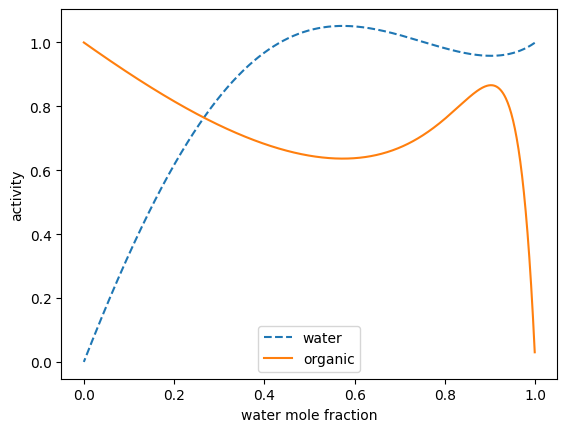

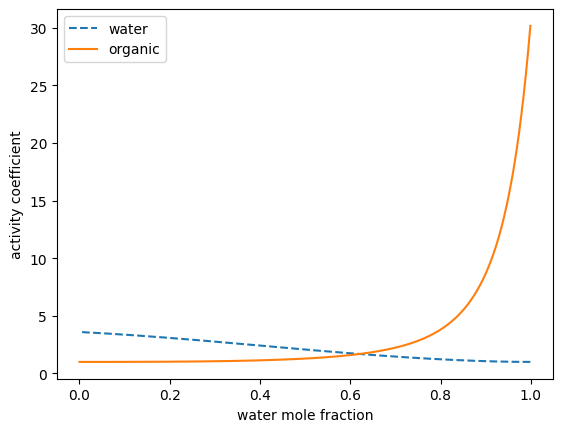

In [3]:
fig, ax = plt.subplots()
ax.plot(
    1 - organic_mole_fraction,
    activity_water,
    label="water",
    linestyle='dashed'
)
ax.plot(
    1 - organic_mole_fraction,
    activity_organic,
    label="organic",
)
ax.set_ylim()
ax.set_xlabel("water mole fraction")
ax.set_ylabel("activity")
ax.legend()
plt.show()

fig, ax = plt.subplots()
ax.plot(
    1 - organic_mole_fraction,
    gamma_water,
    label="water",
    linestyle='dashed'
)
ax.plot(
    1 - organic_mole_fraction,
    gamma_organic,
    label="organic",
)
ax.set_ylim()
ax.set_xlabel("water mole fraction")
ax.set_ylabel("activity coefficient")
ax.legend()
plt.show()

## $ q^\alpha $

The $q^\alpha$ parameter signifies the transition from an organic-rich phase to a water-rich phase. This transition is crucial for understanding the phase behavior of aerosol particles. It can be calculated using the `particula.activity.phase_separation` function. The plot below illustrates $q^\alpha$ based on the activity calculations performed earlier.


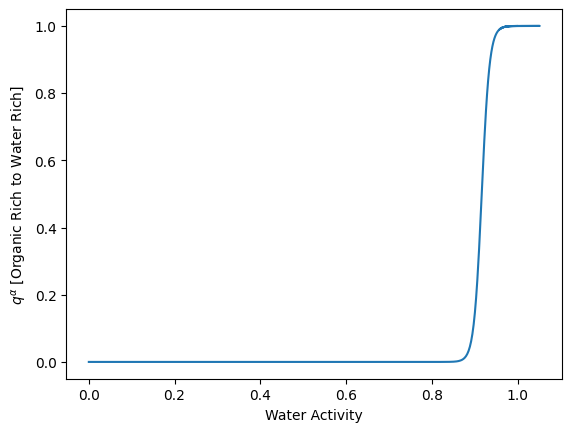

In [4]:
# Finding phase separation points and calculating q_alpha
phase_sep_aw = phase_separation.find_phase_separation(
    activity_water, activity_organic)
q_alpha = phase_separation.q_alpha(
    seperation_activity=phase_sep_aw['upper_seperation'],
    activities=activity_water)

# Plotting q_alpha
fig, ax = plt.subplots()
plt.plot(activity_water, q_alpha)
plt.xlabel('Water Activity')
plt.ylabel('$q^{\\alpha}$ [Organic Rich to Water Rich]')
plt.show()

## Water Activity Focus

In atmospheric aerosol modeling, water activity is often a more critical parameter than mole fraction. This is because water activity is typically a controllable or known variable in atmospheric conditions, unlike the exact mole fractions in a solution. To correlate water activity with the mole fraction required to achieve it, we utilize functions from the `particula.activity` module.

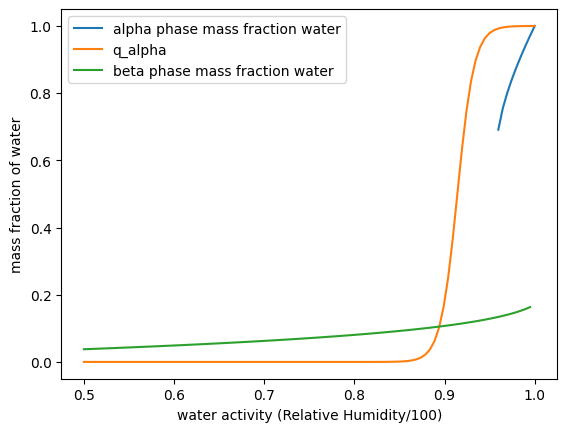

In [5]:
# select the water activity desired
water_activity_desired = np.linspace(0.5, 1, 100)
oxygen2carbon = 0.25

# calculate the mass fraction of water in the alpha and beta phases
# for each water activity
alpha, beta, q_alpha = binary_activity.fixed_water_activity(
        water_activity=water_activity_desired,
        molar_mass_ratio=molar_mass_ratio,
        oxygen2carbon=oxygen2carbon,
        density=density
        )

# plot the results vs water activity
fig, ax = plt.subplots()
ax.plot(
    water_activity_desired,
    alpha[2],
    label="alpha phase mass fraction water",
)
ax.plot(
        water_activity_desired,
        q_alpha,
        label="q_alpha",
        )
if beta is not None:
    ax.plot(
        water_activity_desired,
        beta[2],
        label="beta phase mass fraction water",
    )
ax.set_ylim()
ax.set_xlabel("water activity (Relative Humidity/100)")
ax.set_ylabel("mass fraction of water")
plt.legend()
plt.show()

## Higher Oxygen to Carbon Ratios

Higher oxygen to carbon ratios in the mixture tend to inhibit phase separation. The following analysis demonstrates this effect. This observation is crucial in predicting the behavior of aerosol particles under varying chemical compositions (more or less 'aged').


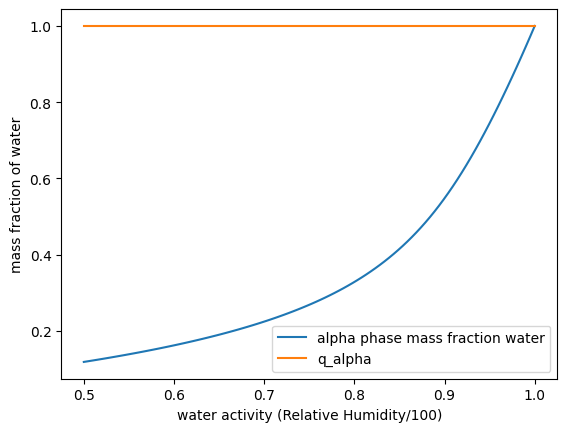

In [6]:
# select the water activity desired
water_activity_desired = np.linspace(0.5, 1, 100)
# select the oxygen to carbon ratio
oxygen2carbon = 0.6

# calculate the mass fraction of water in the alpha and beta phases
# for each water activity
alpha, beta, q_alpha = binary_activity.fixed_water_activity(
    water_activity=water_activity_desired,
    molar_mass_ratio=molar_mass_ratio,
    oxygen2carbon=oxygen2carbon,
    density=density
)

# plot the results vs water activity
fig, ax = plt.subplots()
ax.plot(
    water_activity_desired,
    alpha[2],
    label="alpha phase mass fraction water",
)
ax.plot(
    water_activity_desired,
    q_alpha,
    label="q_alpha",
)
if beta is not None:
    ax.plot(
        water_activity_desired,
        beta[2],
        label="beta phase mass fraction water",
    )
ax.set_ylim()
ax.set_xlabel("water activity (Relative Humidity/100)")
ax.set_ylabel("mass fraction of water")
plt.legend()
plt.show()

# Summary

This notebook demonstrates how to use the activity module for calculating the activity of water and organic compounds in a mixture and assessing phase separation. The insights gained are vital for applications in aerosol thermodynamics, cloud condensation nuclei, and cloud microphysics.

This is an implementation of the Binary Activity Theory (BAT) model
developed in Gorkowski, K., Preston, T. C., & Zuend, A. (2019).

## Further Documentation

For more in-depth understanding and additional functionalities, refer to the documentation, or call the `help` function on any of the functions in the `particula.activity` module.



In [7]:
help(binary_activity)

Help on module particula.activity.binary_activity in particula.activity:

NAME
    particula.activity.binary_activity - Binary activity coefficient model for organic-water mixtures.

DESCRIPTION
    Gorkowski, K., Preston, T. C., &#38; Zuend, A. (2019).
    Relative-humidity-dependent organic aerosol thermodynamics
    Via an efficient reduced-complexity model.
    Atmospheric Chemistry and Physics
    https://doi.org/10.5194/acp-19-13383-2019

FUNCTIONS
    activity_coefficients(molar_mass_ratio: Union[numpy.__array_like._SupportsArray[numpy.dtype[Any]], numpy.__nested_sequence._NestedSequence[numpy.__array_like._SupportsArray[numpy.dtype[Any]]], bool, int, float, complex, str, bytes, numpy.__nested_sequence._NestedSequence[Union[bool, int, float, complex, str, bytes]]], organic_mole_fraction: Union[numpy.__array_like._SupportsArray[numpy.dtype[Any]], numpy.__nested_sequence._NestedSequence[numpy.__array_like._SupportsArray[numpy.dtype[Any]]], bool, int, float, complex, str, bytes, nu